In [1]:
import os
os.chdir(os.path.join(os.getcwd(), '..'))

In [16]:
from utils.data_utils import load_recording
from utils.data_utils import plot_first_n, plot_spec
import torch
from tqdm import tqdm

In [10]:
a = torch.load('/home/ps5359/data/1k/cache/1.pt')[0]
a

tensor([[ 2.2108e-06, -4.7952e-06, -9.2768e-06,  ..., -1.4178e-06,
         -1.7017e-05, -1.9045e-05],
        [ 2.0014e-06, -2.8372e-06, -7.5456e-06,  ..., -4.1277e-07,
         -1.5195e-05, -1.8817e-05],
        [-1.0327e-05, -1.7563e-05, -2.1532e-05,  ...,  1.5204e-06,
         -1.2742e-05, -1.6234e-05],
        [-2.4355e-06, -1.0512e-05, -1.5340e-05,  ..., -8.6764e-07,
         -1.6132e-05, -1.7819e-05]])

In [33]:
import torch
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Define the function to process each file
def process_file(i):
    x = torch.load(f'/home/ps5359/data/1k/cache/{i}.pt')[0]
    return ((abs(x) == 1e-4) * 100.0).mean()

pth = '/home/ps5359/data/1k/cache/'
res = []

# Use ThreadPoolExecutor to parallelize the workload
with ThreadPoolExecutor(max_workers=8) as executor:
    futures = {executor.submit(process_file, i): i for i in range(12067)}
    
    for future in tqdm(as_completed(futures), total=len(futures)):
        try:
            result = future.result()
            res.append(result)
        except Exception as e:
            print(f"Error processing file: {futures[future]} - {e}")

100%|██████████| 12067/12067 [00:41<00:00, 291.89it/s]


In [44]:
dirty = torch.tensor(res)

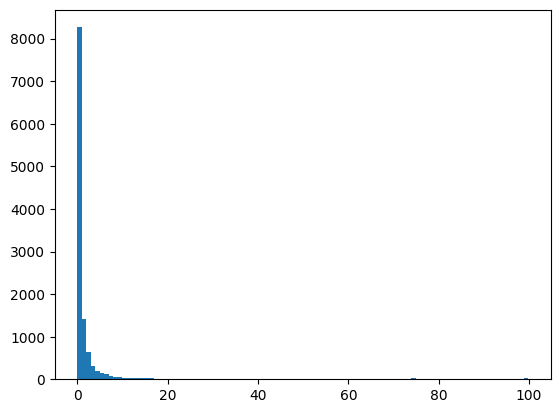

In [47]:
import matplotlib.pyplot as plt

plt.hist(dirty, bins=100)
# plt.xscale('log')
None

In [50]:
((dirty < 0.1) * 100.0).mean()

tensor(27.2313)

In [54]:
pth = '/home/ps5359/data/full_clean/cache/'
res = []
for i in tqdm(range(850)):
    x = torch.load(f'/home/ps5359/data/full_clean/cache/{i}.pt')[0]
    res.append(((abs(x) == 1e-4) * 100.0).mean())
clean = torch.tensor(res)

100%|██████████| 850/850 [00:33<00:00, 25.03it/s]


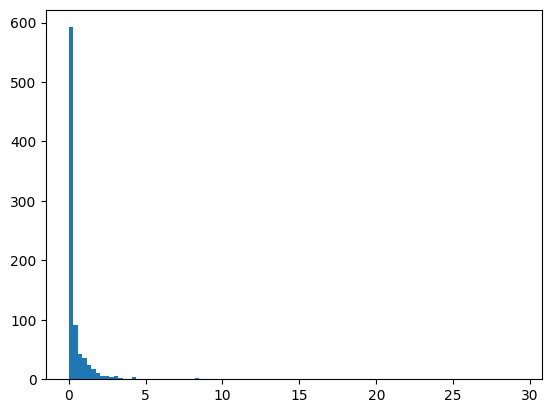

In [57]:
import matplotlib.pyplot as plt

plt.hist(clean, bins=100)
# plt.xscale('log')
None

In [58]:
((clean < 0.1) * 100.0).mean()

tensor(50.1176)

In [73]:
((dirty == 0) * 100.0).mean()

tensor(3.6297)

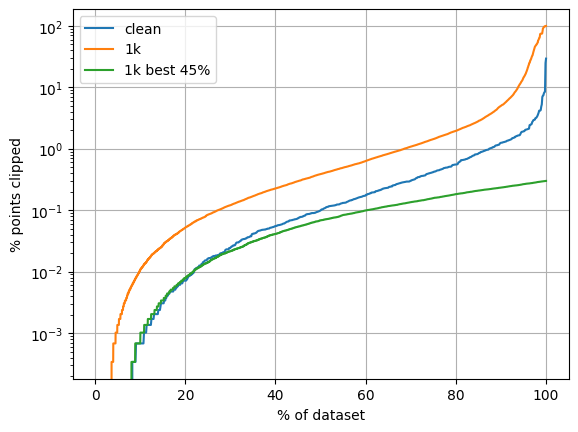

In [91]:
dirty_part = dirty[dirty < 0.3] 
plt.plot(100 * torch.arange(clean.shape[0]) / (clean.shape[0] - 1), torch.sort(clean).values, label='clean')
plt.plot(100 * torch.arange(dirty.shape[0]) / (dirty.shape[0] - 1), torch.sort(dirty).values, label='1k')
plt.plot(100 * torch.arange(dirty_part.shape[0]) / (dirty_part.shape[0] - 1), torch.sort(dirty_part).values, label=f'1k best {100.0 * dirty_part.shape[0] / dirty.shape[0]:.0f}%')
# plt.plot([0, 100], [0.1, 0.1])
# plt.plot([0, 100], [1, 1])
plt.legend()
plt.yscale('log')
plt.xlabel('% of dataset')
plt.ylabel('% points clipped')
plt.grid()

In [92]:
clean.shape

torch.Size([850])